In [1]:
!pip install rudalle==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 994.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 37.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.6 MB/s eta 0:00:00
  Preparin

In [3]:
!pip install ruclip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 742.1 kB/s eta 0:00:0000:010:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cached-path 1.1.6 requires huggingface-hub<0.11.0,>=0.8.1, but you have huggingface-hub 0.2.1 which is incompatible.


In [7]:
import ruclip
from rudalle.pipelines import generate_images, show, super_resolution, cherry_pick_by_ruclip
from rudalle import get_rudalle_model, get_tokenizer, get_vae, get_realesrgan
from rudalle.utils import seed_everything

# prepare models:
device = 'cuda'
dalle = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device)
tokenizer = get_tokenizer()
vae = get_vae(dwt=True).to(device)
seed_everything(42)

  0%|          | 0/398 [00:00<?, ?it/s]

◼️ Malevich is 1.3 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.
tokenizer --> ready
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.
vae --> ready
x2 --> ready


  0%|          | 0/1024 [00:00<?, ?it/s]

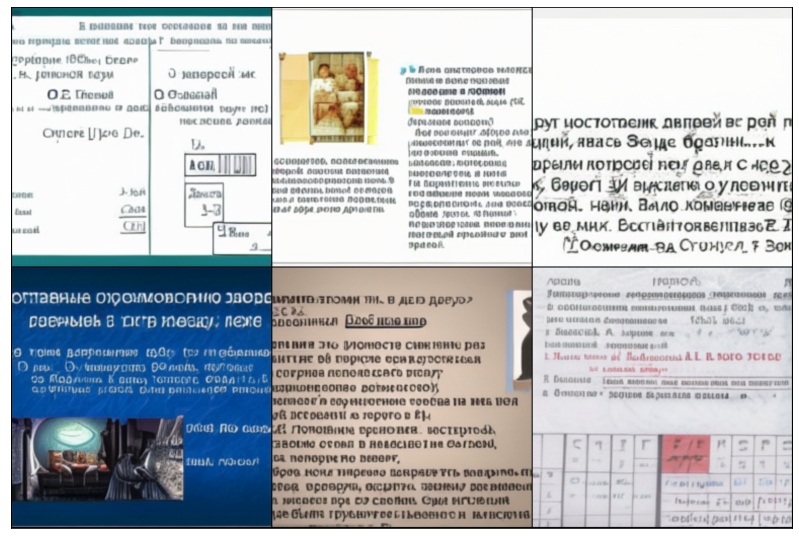

In [17]:
text = 'В зале было множество дверей, но все они были заперты. Алиса убедилась в этом, подёргав каждую из них. Огорчённая, она бродила по залу, раздумывая над тем, как же ей выбраться отсюда.И вдруг Алиса увидела в центре зала столик из толстого стекла, а на нём золотой ключик. Алиса обрадовалась – она решила, что это ключ от одной из дверей.'
pil_image, score = generate_images(text, tokenizer, dalle, vae, top_k=2048, top_p=0.995, images_num=6, bs=8)
show(pil_image, 3)

  0%|          | 0/1024 [00:00<?, ?it/s]

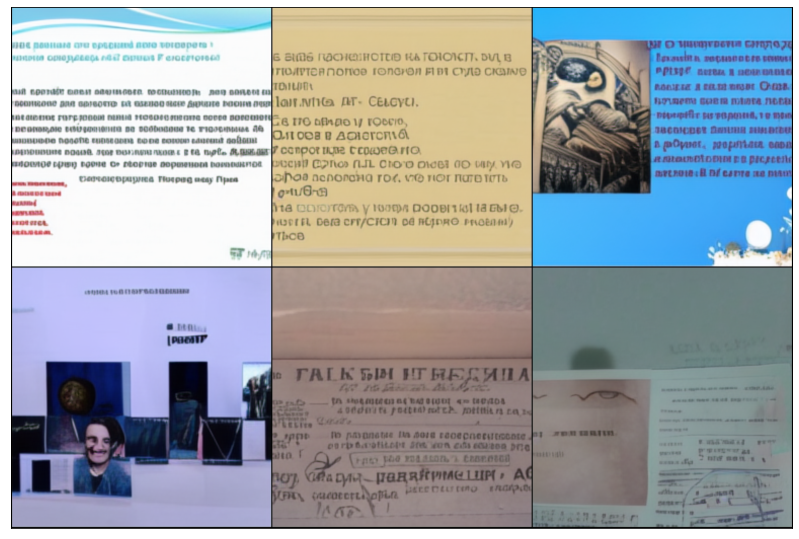

In [18]:
text = 'Зал, много дверей, все заперты. Алиса убедилась в этом, подёргав каждую из них. Алиса бродила по залу, раздумывая над тем, как же ей выбраться отсюда.И вдруг Алиса увидела в центре зала столик из толстого стекла, а на нём золотой ключик. Алиса решила, что это ключ от одной из дверей.'
pil_image, score = generate_images(text, tokenizer, dalle, vae, top_k=2048, top_p=0.995, images_num=6, bs=8)
show(pil_image, 3)

  0%|          | 0/1024 [00:00<?, ?it/s]

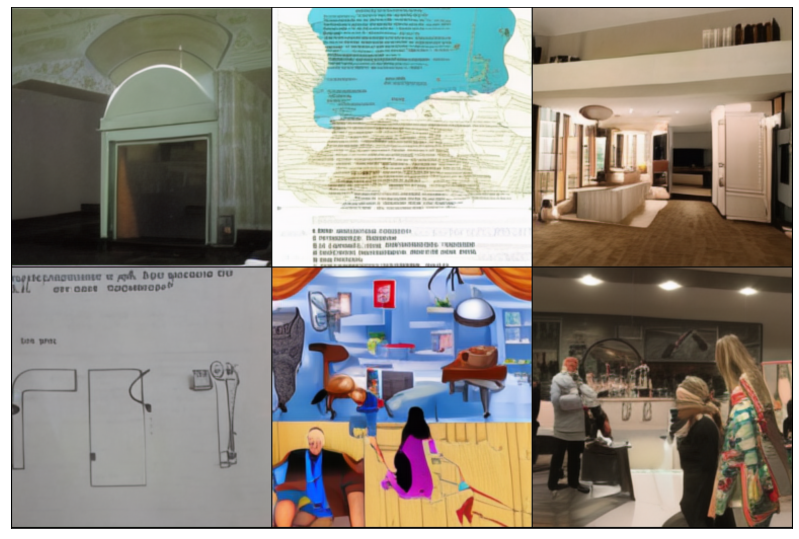

In [19]:
text = 'Зал, много дверей, все заперты. Алиса увидела в центре зала столик из толстого стекла, а на нём золотой ключик. Алиса решила, что это ключ от одной из дверей.'
pil_image, score = generate_images(text, tokenizer, dalle, vae, top_k=2048, top_p=0.995, images_num=6, bs=8)
show(pil_image, 3)

  0%|          | 0/1024 [00:00<?, ?it/s]

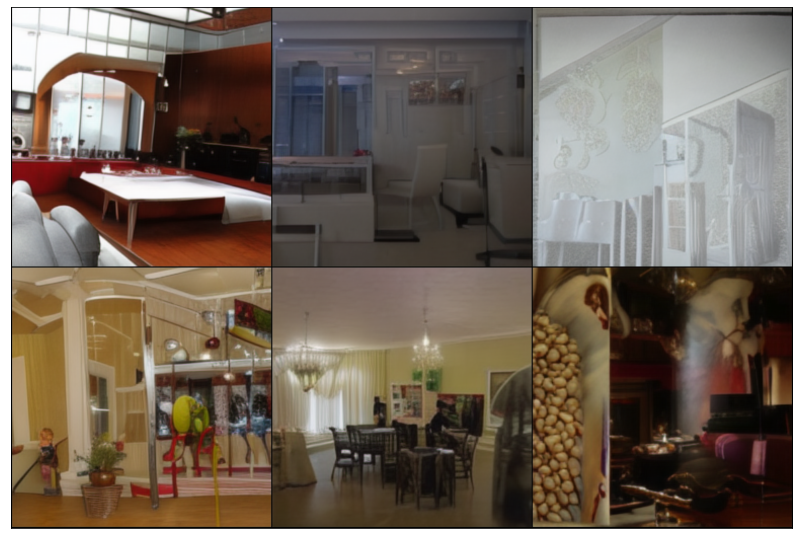

In [20]:
text = 'Зал, много дверей, все заперты, в центре зала столик из толстого стекла, а на нём золотой ключик. Алиса стоит рядом со столиком.'
pil_image, score = generate_images(text, tokenizer, dalle, vae, top_k=2048, top_p=0.995, images_num=6, bs=8)
show(pil_image, 3)

  0%|          | 0/1024 [00:00<?, ?it/s]

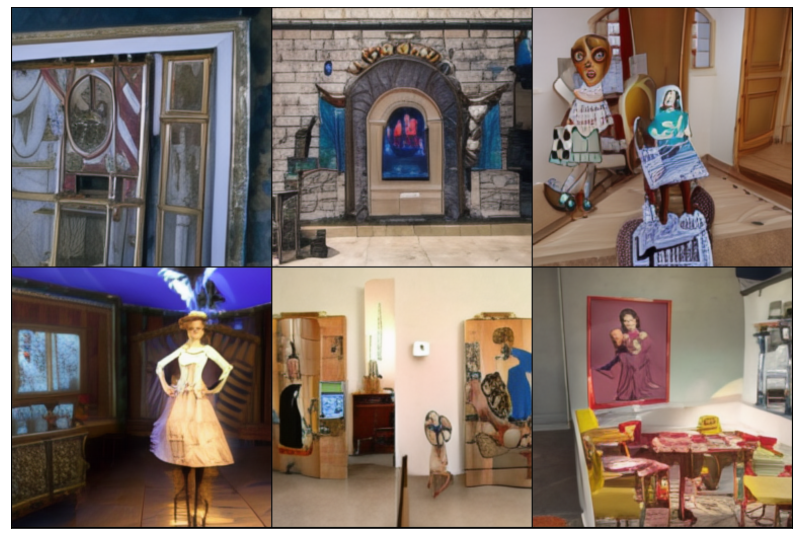

In [22]:
text = 'Алиса в стране чудес в зале, много дверей, в центре столик из стекла, а на нём золотой ключ. Алиса стоит рядом со столиком.'
pil_image, score = generate_images(text, tokenizer, dalle, vae, top_k=2048, top_p=0.995, images_num=6, bs=8)
show(pil_image, 3)

  0%|          | 0/1024 [00:00<?, ?it/s]

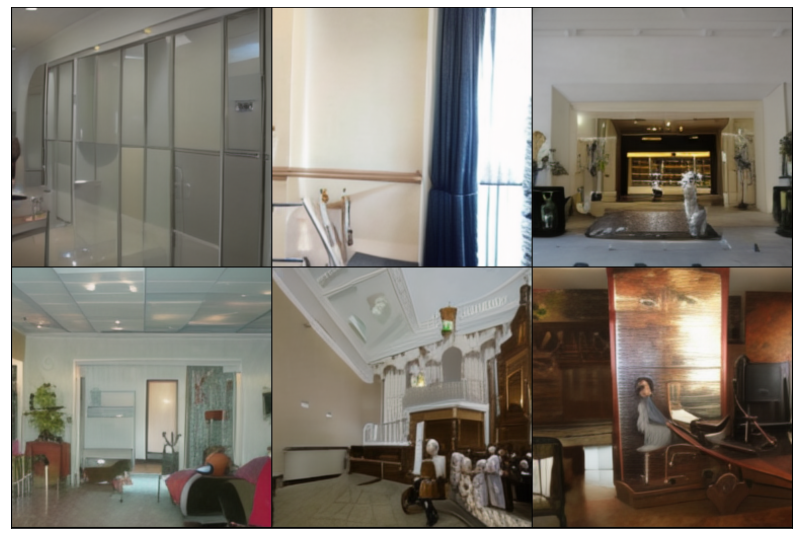

In [23]:
text = 'Большой зал, в котором много дверей. В центре зала стоит стеклянный стол, на котором лежит золотой ключик. Рядом со столом стоит девочка с русыми волосами.'
pil_image, score = generate_images(text, tokenizer, dalle, vae, top_k=2048, top_p=0.995, images_num=6, bs=8)
show(pil_image, 3)

  0%|          | 0/1024 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/rudalle/dalle/model.py:95: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim


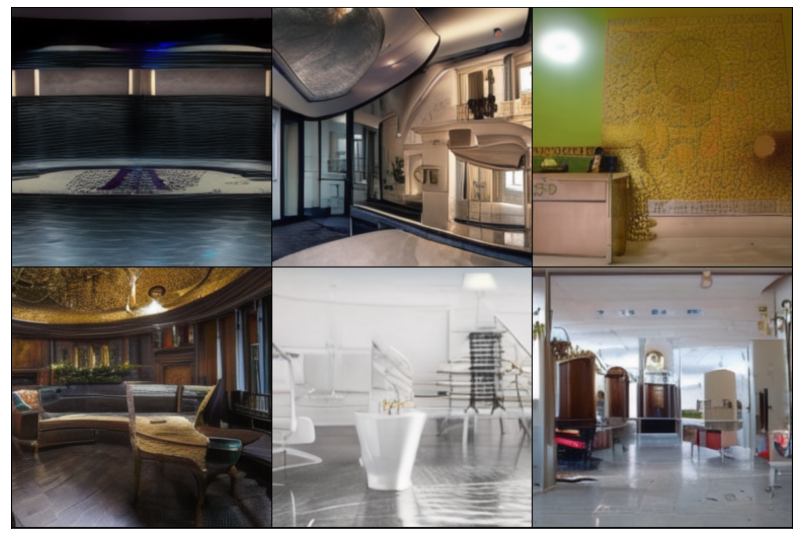

In [24]:
text = 'Большой зал, много дверей, стеклянный стол на котором лежит золотой ключ.'
pil_image, score = generate_images(text, tokenizer, dalle, vae, top_k=2048, top_p=0.995, images_num=6, bs=8)
show(pil_image, 3)

  0%|          | 0/1024 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/rudalle/dalle/model.py:95: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim


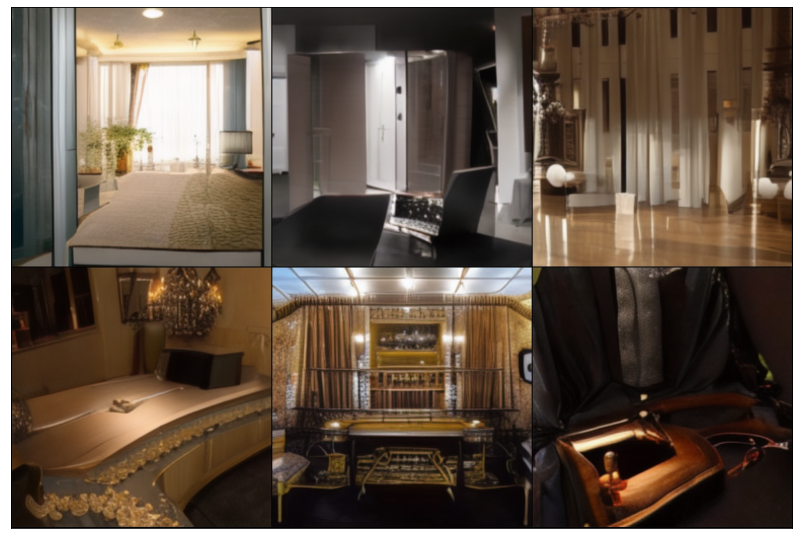

In [25]:
text = 'Большой зал, 10 дверей, стеклянный стол на котором лежит золотой ключ, темно.'
pil_image, score = generate_images(text, tokenizer, dalle, vae, top_k=2048, top_p=0.995, images_num=6, bs=8)
show(pil_image, 3)